# Histograms

 http://www.cambridgeincolour.com/tutorials/histograms1.htm

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Image Histograms with OpenCV

Recall that Matplotlib expects the images in a different RGB ordering vs BGR in OpenCV, so if we use OpenCV to calculate anything channel oriented, we'll want to make sure we keep the original RGB ordering, however if we ever want to display the image, then we'll need to convert to the RGB ordering that matplotlib wants.

----

In [2]:
dark_horse = cv2.imread('../DATA/horse.jpg') # Original BGR
show_horse = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB) # Convert to RGB

rainbow = cv2.imread('../DATA/rainbow.jpg')
show_rainbow =cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

blue_bricks = cv2.imread('../DATA/bricks.jpg')
show_bricks = cv2.cvtColor(blue_bricks, cv2.COLOR_BGR2RGB)

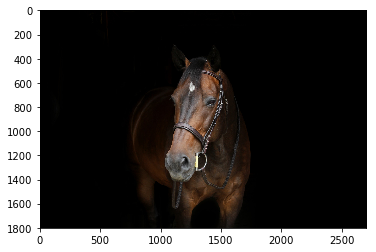

In [6]:
plt.imshow(show_horse)

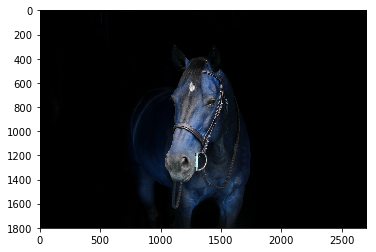

In [7]:
plt.imshow(dark_horse)

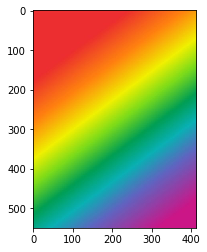

In [20]:
plt.imshow(show_rainbow)

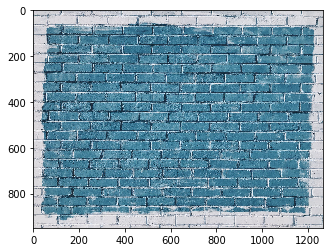

In [21]:
plt.imshow(show_bricks)

### OpenCV Histogram

**cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])**

* images : it is the source image of type uint8 or float32 given in square brackets[img]
* channels : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
* mask : mask image.
* histSize : this represents our BIN count given in square brackets. For full scale, we pass [256].
* ranges : Normally [0,256].

In [8]:
hist_values = cv2.calcHist([blue_bricks],channels=[0],mask=None,histSize=[256],ranges=[0,256]) # channels : blue (BGR)
hist_values.shape

(256, 1)

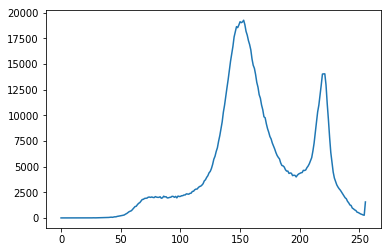

In [34]:
# BLUE Hist
plt.plot(hist_values)

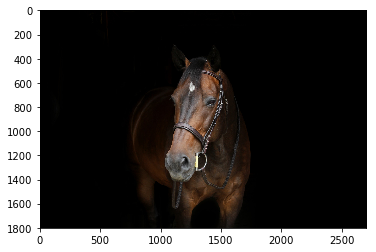

In [9]:
plt.imshow(show_horse)

In [35]:
hist_values = cv2.calcHist([dark_horse],channels=[0],mask=None,histSize=[256],ranges=[0,256])

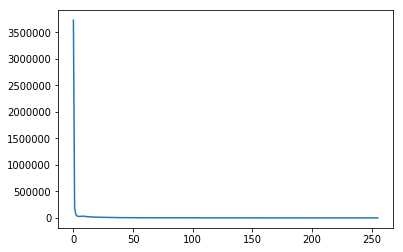

In [37]:
plt.plot(hist_values)

## Plotting 3 Color Histograms All At Once

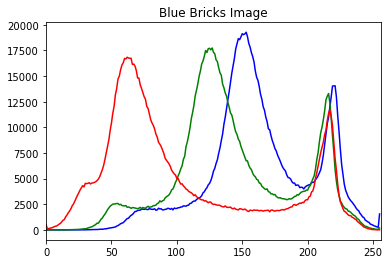

In [11]:
img = blue_bricks
colors = ('b','g','r')
for i,color in enumerate(colors):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = color) # B G R 
    plt.xlim([0,256])
plt.title('Blue Bricks Image')
plt.show()

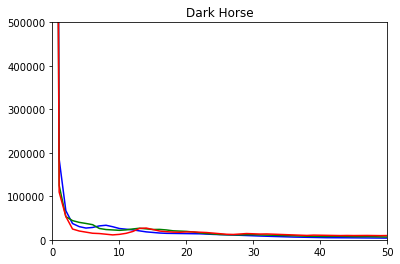

In [14]:
img = dark_horse
colors = ('b','g','r')
for i,color in enumerate(colors):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = color)
    plt.xlim([0,50])
    plt.ylim([0,500000])
plt.title('Dark Horse')
plt.show()

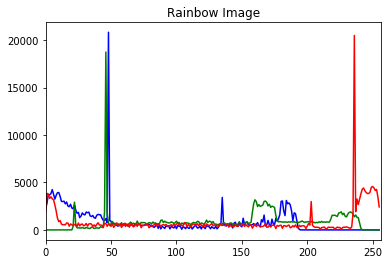

In [47]:
img = rainbow
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.title('Rainbow Image')
plt.show()

### Masking

We can mask only certain parts of the image.

In [6]:
img = rainbow

In [7]:
img.shape

(550, 413, 3)

In [8]:
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[300:400, 100:400] = 255

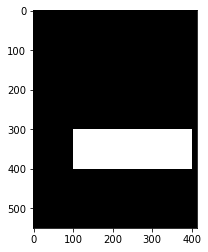

In [9]:
plt.imshow(mask,cmap='gray')

In [10]:
masked_img = cv2.bitwise_and(img,img,mask = mask)
show_masked_img = cv2.bitwise_and(show_rainbow,show_rainbow,mask = mask)

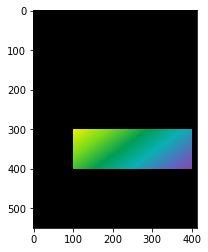

In [11]:
plt.imshow(show_masked_img)

In [12]:
hist_mask_values_red = cv2.calcHist([rainbow],channels=[2],mask=mask,histSize=[256],ranges=[0,256])
hist_full_values_red = cv2.calcHist([rainbow],channels=[2],mask=None,histSize=[256],ranges=[0,256])

plt.show(his

Text(0.5,1,'Histogram for RED values of the full image')

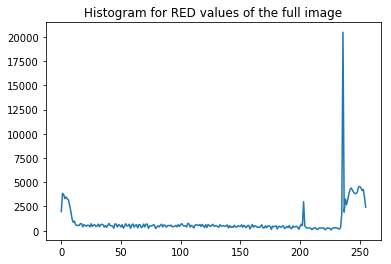

In [13]:
plt.plot(hist_full_values_red)
plt.title('Histogram for RED values of the full image')

Text(0.5,1,'Histogram for RED values for the Masked Area')

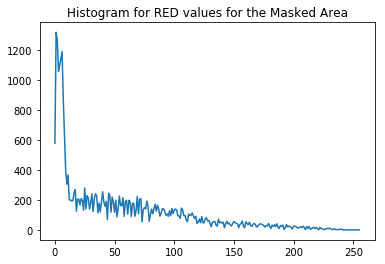

In [14]:
plt.plot(hist_mask_values_red)
plt.title('Histogram for RED values for the Masked Area')

# Histogram Equalization

Reduces the color depth (shades of gray)

We take min and max values and apply histogram equalization where min value is transformed to 0 and max value is 255. We flatten out the values seeing less shades of gray.

In [3]:
gorilla = cv2.imread('../DATA/gorilla.jpg',0)

In [4]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

## Single Channel (Grayscale)

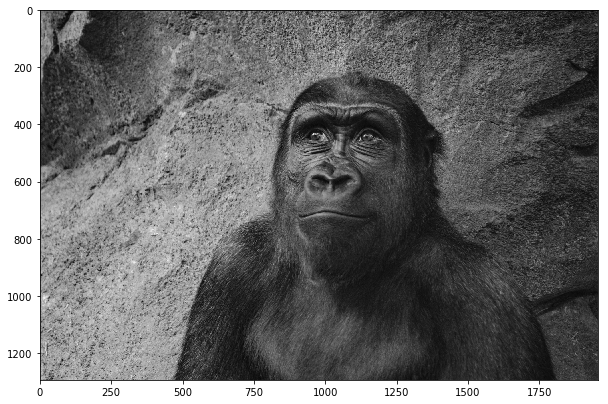

In [5]:
display(gorilla,cmap='gray')

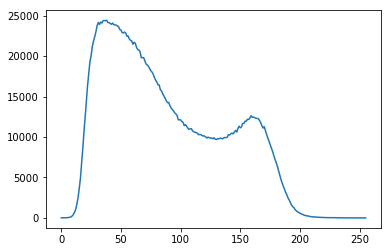

In [16]:
hist_values = cv2.calcHist([gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])

plt.plot(hist_values)

cv2.equalizeHist(img)

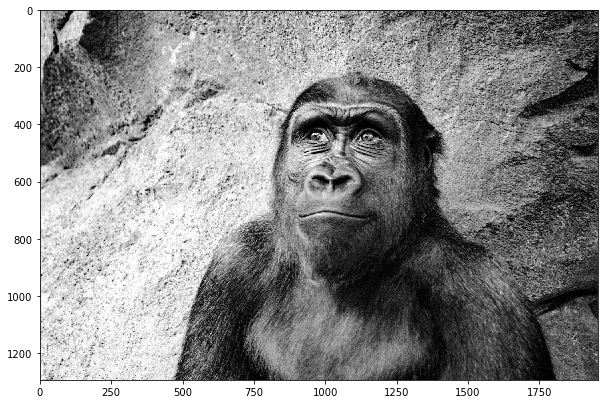

In [17]:
eq_gorilla = cv2.equalizeHist(gorilla)
display(eq_gorilla,cmap='gray')

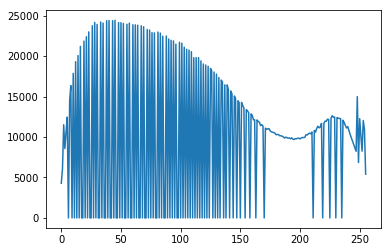

In [18]:
# displaying histograms of image
hist_values = cv2.calcHist([eq_gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])

plt.plot(hist_values)

## Color Images

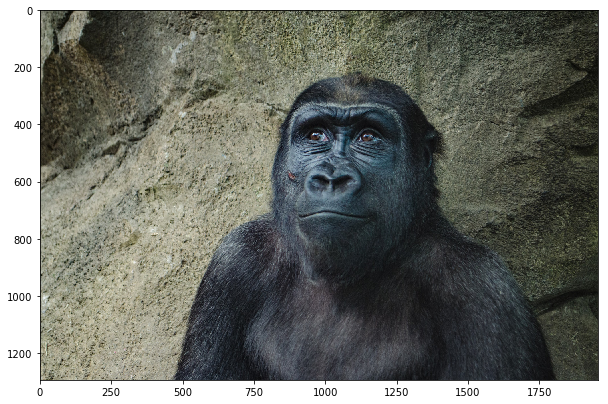

In [20]:
color_gorilla = cv2.imread('../DATA/gorilla.jpg')
show_gorilla = cv2.cvtColor(color_gorilla,cv2.COLOR_BGR2RGB)
# Convert to HSV colorspace
hsv = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2HSV)

display(show_gorilla)

In [123]:
# Grab V channel
hsv[:,:,2]

array([[127, 121, 115, ...,  43,  42,  42],
       [121, 124, 123, ...,  47,  49,  51],
       [118, 129, 131, ...,  47,  50,  53],
       ...,
       [196, 197, 184, ...,  55,  55,  55],
       [184, 185, 182, ...,  51,  52,  53],
       [173, 170, 173, ...,  49,  50,  50]], dtype=uint8)

In [124]:
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])

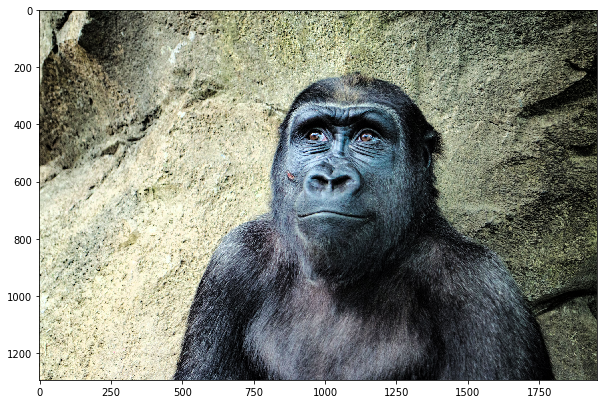

In [125]:
# Convert back to RGB to visualize
eq_color_gorilla = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
display(eq_color_gorilla)